In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import sklearn
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(sklearn.__version__)
print(matplotlib.__version__)

1.18.4
1.0.3
0.10.1
0.23.1
3.2.1


In [13]:
df_1 = pd.read_csv("Emission.csv",parse_dates=True,squeeze=True,index_col=0)

In [33]:
df_1.head(15)

Year-Month
1973-01-01    106.363
1973-02-01    101.760
1973-03-01    110.553
1973-04-01    104.734
1973-05-01    114.897
1973-06-01    109.240
1973-07-01    112.139
1973-08-01    116.683
1973-09-01    106.558
1973-10-01    111.655
1973-11-01    112.111
1973-12-01    108.505
1974-01-01    101.702
1974-02-01     94.699
1974-03-01    104.722
Name: CO2 Emission, dtype: float64

In [36]:
df_1.tail()

Year-Month
2013-02-01    134.243
2013-03-01    153.078
2013-04-01    149.442
2013-05-01    156.356
2013-06-01    152.814
Name: CO2 Emission, dtype: float64

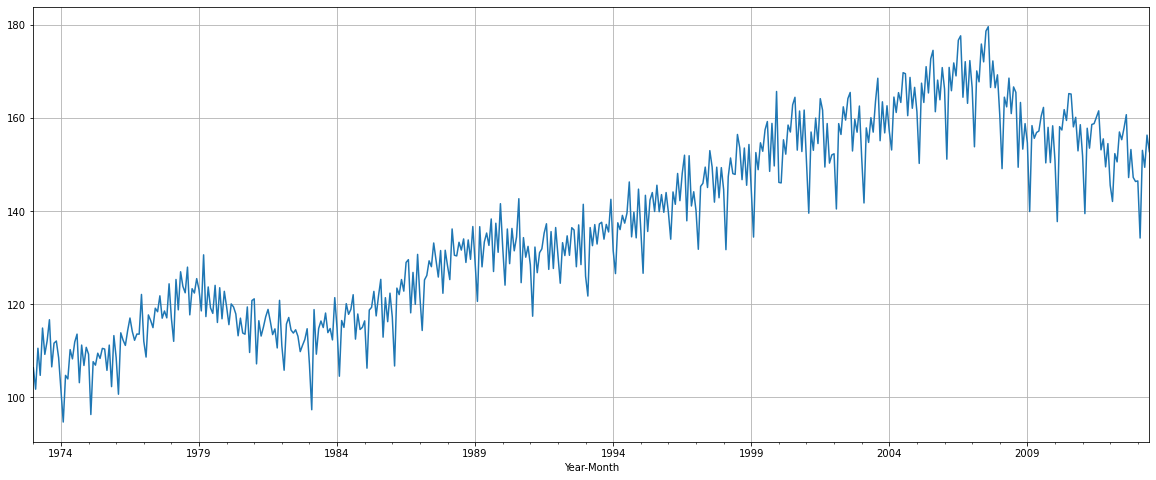

In [35]:
df_1.plot(figsize=(20,8))
plt.grid();

In [19]:
df_2 = pd.read_csv("Emission.csv")

In [43]:
date = pd.date_range(start='1/1/1973', end='7/1/2013', freq='M')
date

DatetimeIndex(['1973-01-31', '1973-02-28', '1973-03-31', '1973-04-30',
               '1973-05-31', '1973-06-30', '1973-07-31', '1973-08-31',
               '1973-09-30', '1973-10-31',
               ...
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30'],
              dtype='datetime64[ns]', length=486, freq='M')

In [44]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Year-Month'])
df_2.head()

,Year-Month,CO2 Emission,Time_Stamp
0,1973-Jan,106.363,1973-01-31
1,1973-Feb,101.760,1973-02-28
2,1973-Mar,110.553,1973-03-31
3,1973-Apr,104.734,1973-04-30
4,1973-May,114.897,1973-05-31


In [45]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [46]:
df = df_2.set_index('Time_Stamp')
df.drop(['Year-Month'], axis=1, inplace=True)
df.head()

,CO2 Emission
Time_Stamp,
1973-01-31,106.363
1973-02-28,101.760
1973-03-31,110.553
1973-04-30,104.734
1973-05-31,114.897


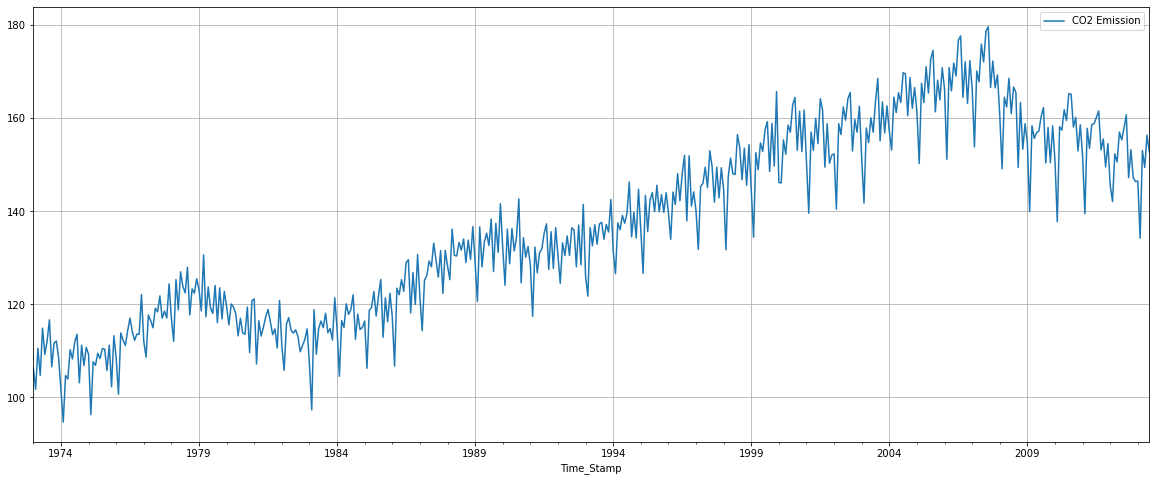

In [47]:
df.plot(figsize=(20,8))
plt.grid();

In [48]:
df

,CO2 Emission
Time_Stamp,
1973-01-31,106.363
1973-02-28,101.760
1973-03-31,110.553
1973-04-30,104.734
1973-05-31,114.897
...,...
2013-02-28,134.243
2013-03-31,153.078
2013-04-30,149.442


In [94]:
train    =   df[0:int(len(df)*0.8)] 
test     =   df[int(len(df)*0.8):]
SES_train = np.log(train.copy()[:])
SES_test = np.log(test.copy()[:])



In [95]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [96]:
model_SES = SimpleExpSmoothing(SES_train['CO2 Emission'])

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [97]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [98]:
model_SES_autofit.params

{'smoothing_level': 0.18099269253721542,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 4.680125311196167,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [99]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,CO2 Emission,predict
Time_Stamp,,
1973-01-31,4.666858,4.680125
1973-02-28,4.622617,4.677724
1973-03-31,4.705495,4.667750
1973-04-30,4.651424,4.674582
1973-05-31,4.744036,4.670390


In [100]:
len(SES_test)

98

In [101]:
SES_test['predict'] = model_SES_autofit.forecast(steps=98)
SES_test.head()

,CO2 Emission,predict
Time_Stamp,,
2005-05-31,5.142073,5.091121
2005-06-30,5.108482,5.091121
2005-07-31,5.151822,5.091121
2005-08-31,5.162366,5.091121
2005-09-30,5.083762,5.091121


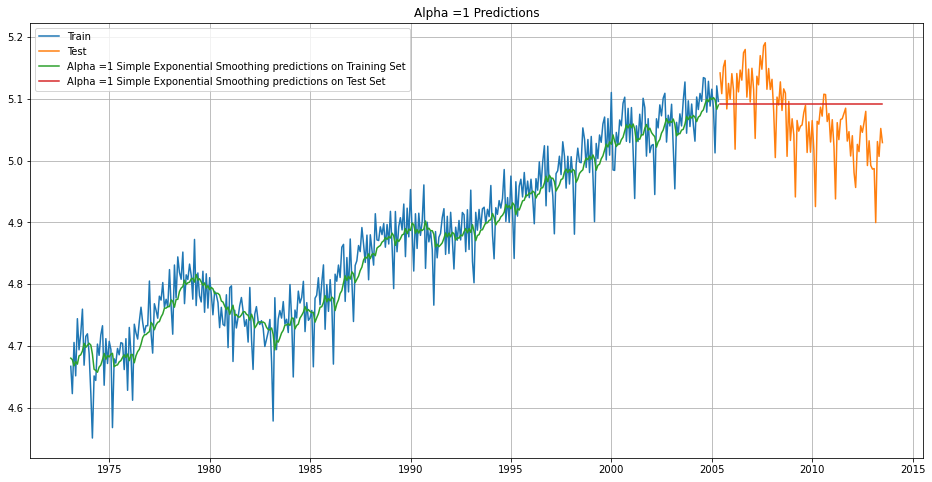

In [102]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['CO2 Emission'], label='Train')
plt.plot(SES_test['CO2 Emission'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

In [103]:
from sklearn import metrics

In [104]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [105]:
rmse_model5_train_1 = metrics.mean_squared_error(SES_train['CO2 Emission'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['CO2 Emission'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 0.042 MAPE is 0.71


In [106]:
## Test Data - RMSE and MAPE

## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['CO2 Emission'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['CO2 Emission'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 0.063 MAPE is 0.99


# DOUBLE EXPONENTIAL

In [113]:
DES_train = train.copy()
DES_test = test.copy()

In [114]:
model_DES = Holt(DES_train['CO2 Emission'])
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params
DES_train['predict'] = model_DES_autofit.fittedvalues
DES_train.head()

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,CO2 Emission,predict
Time_Stamp,,
1973-01-31,106.363,106.335390
1973-02-28,101.760,106.338924
1973-03-31,110.553,105.753077
1973-04-30,104.734,106.307563
1973-05-31,114.897,106.109387


In [115]:
len(DES_test)

98

In [116]:
DES_test['predict'] = model_DES_autofit.forecast(steps=98)
DES_test.head()

,CO2 Emission,predict
Time_Stamp,,
2005-05-31,171.070,165.039917
2005-06-30,165.419,165.271443
2005-07-31,172.746,165.502969
2005-08-31,174.577,165.734495
2005-09-30,161.380,165.966021


In [118]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(DES_test['CO2 Emission'],DES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(DES_test['CO2 Emission'],DES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 22.224 MAPE is 11.49


In [79]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [86]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=98)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['CO2 Emission'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['CO2 Emission'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['CO2 Emission'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['CO2 Emission'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa

In [87]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,6.090328,3.81,29.409547,16.86
1,0.3,0.4,6.316659,3.95,38.383383,21.96
2,0.3,0.5,6.547579,4.11,40.834669,23.40
3,0.3,0.6,6.762402,4.23,34.117794,19.74
4,0.3,0.7,6.928233,4.29,14.692169,8.45
...,...,...,...,...,...,...
459,1.0,0.6,10.120735,6.33,31.622348,16.31
460,1.0,0.7,10.743168,6.75,8.340299,4.05
461,1.0,0.8,11.435723,7.20,47.949570,26.94
462,1.0,0.9,12.211519,7.72,124.043494,68.51


In [90]:
resultsDf_7.sort_values(by=['Test RMSE']).head(98)

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
305,0.5,0.2,6.256892,3.88,8.160574,4.12
205,0.5,0.2,6.256892,3.88,8.160574,4.12
405,0.5,0.2,6.256892,3.88,8.160574,4.12
105,0.5,0.2,6.256892,3.88,8.160574,4.12
60,1.0,0.7,10.743168,6.75,8.340299,4.05
...,...,...,...,...,...,...
434,0.8,0.1,6.899892,4.29,17.839174,9.23
344,0.9,0.1,7.289373,4.55,18.079187,9.35
444,0.9,0.1,7.289373,4.55,18.079187,9.35
144,0.9,0.1,7.289373,4.55,18.079187,9.35


In [89]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
360,1.0,0.7,10.743168,6.75,8.340299,4.05
160,1.0,0.7,10.743168,6.75,8.340299,4.05
460,1.0,0.7,10.743168,6.75,8.340299,4.05
260,1.0,0.7,10.743168,6.75,8.340299,4.05
60,1.0,0.7,10.743168,6.75,8.340299,4.05
